<div class="alert alert-info" role="alert">
<h1>  Travel Salesman with 194 cities (Qatar)</h1>
</div>

In [40]:
import random
import array
import tsplib95
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations
from satsp import solver

## Exploring the Data

In [2]:
problem = tsplib95.load('data/qa194.tsp')

In [3]:
print(problem.render())

NAME: qa194
COMMENT: Derived from National Imagery and Mapping Agency data
TYPE: TSP
DIMENSION: 194
EDGE_WEIGHT_TYPE: EUC_2D
NODE_COORD_SECTION:
1 24748.3333 50840.0
2 24758.8889 51211.9444
3 24827.2222 51394.7222
4 24904.4444 51175.0
5 24996.1111 51548.8889
6 25010.0 51039.4444
7 25030.8333 51275.2778
8 25067.7778 51077.5
9 25100.0 51516.6667
10 25103.3333 51521.6667
11 25121.9444 51218.3333
12 25150.8333 51537.7778
13 25158.3333 51163.6111
14 25162.2222 51220.8333
15 25167.7778 51606.9444
16 25168.8889 51086.3889
17 25173.8889 51269.4444
18 25210.8333 51394.1667
19 25211.3889 51619.1667
20 25214.1667 50807.2222
21 25214.4444 51378.8889
22 25223.3333 51451.6667
23 25224.1667 51174.4444
24 25233.3333 51333.3333
25 25234.1667 51203.0556
26 25235.5556 51330.0
27 25235.5556 51495.5556
28 25242.7778 51428.8889
29 25243.0556 51452.5
30 25252.5 51559.1667
31 25253.8889 51535.2778
32 25253.8889 51549.7222
33 25256.9444 51398.8889
34 25263.6111 51516.3889
35 25265.8333 51545.2778
36 25266.6667

In [4]:
problem.keywords_by_name

{'name': 'NAME',
 'comment': 'COMMENT',
 'type': 'TYPE',
 'dimension': 'DIMENSION',
 'capacity': 'CAPACITY',
 'node_coord_type': 'NODE_COORD_TYPE',
 'edge_weight_type': 'EDGE_WEIGHT_TYPE',
 'display_data_type': 'DISPLAY_DATA_TYPE',
 'edge_weight_format': 'EDGE_WEIGHT_FORMAT',
 'edge_data_format': 'EDGE_DATA_FORMAT',
 'node_coords': 'NODE_COORD_SECTION',
 'edge_data': 'EDGE_DATA_SECTION',
 'edge_weights': 'EDGE_WEIGHT_SECTION',
 'display_data': 'DISPLAY_DATA_SECTION',
 'fixed_edges': 'FIXED_EDGES_SECTION',
 'depots': 'DEPOT_SECTION',
 'demands': 'DEMAND_SECTION',
 'tours': 'TOUR_SECTION'}

In [5]:
print('problem: ', problem.name)
print('dimension:', problem.dimension)
N_POINTS = problem.dimension

problem:  qa194
dimension: 194


In [6]:
positions = problem.node_coords
positions

{1: [24748.3333, 50840.0],
 2: [24758.8889, 51211.9444],
 3: [24827.2222, 51394.7222],
 4: [24904.4444, 51175.0],
 5: [24996.1111, 51548.8889],
 6: [25010.0, 51039.4444],
 7: [25030.8333, 51275.2778],
 8: [25067.7778, 51077.5],
 9: [25100.0, 51516.6667],
 10: [25103.3333, 51521.6667],
 11: [25121.9444, 51218.3333],
 12: [25150.8333, 51537.7778],
 13: [25158.3333, 51163.6111],
 14: [25162.2222, 51220.8333],
 15: [25167.7778, 51606.9444],
 16: [25168.8889, 51086.3889],
 17: [25173.8889, 51269.4444],
 18: [25210.8333, 51394.1667],
 19: [25211.3889, 51619.1667],
 20: [25214.1667, 50807.2222],
 21: [25214.4444, 51378.8889],
 22: [25223.3333, 51451.6667],
 23: [25224.1667, 51174.4444],
 24: [25233.3333, 51333.3333],
 25: [25234.1667, 51203.0556],
 26: [25235.5556, 51330.0],
 27: [25235.5556, 51495.5556],
 28: [25242.7778, 51428.8889],
 29: [25243.0556, 51452.5],
 30: [25252.5, 51559.1667],
 31: [25253.8889, 51535.2778],
 32: [25253.8889, 51549.7222],
 33: [25256.9444, 51398.8889],
 34: [2526

In [7]:
cities = list(problem.get_nodes())
coordinates = np.array([problem.node_coords[city] for city in cities])

(-0.5, 350.5, 753.5, -0.5)

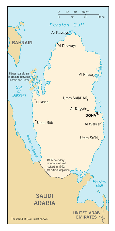

In [8]:
image = plt.imread('data/qamap.jpg')
plt.imshow(image)
plt.axis('off')

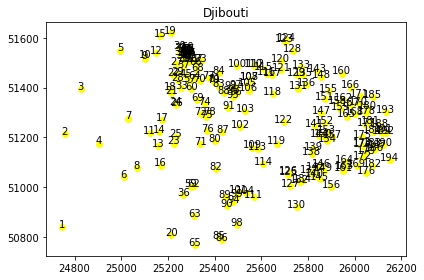

In [9]:
plt.title('Djibouti')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='yellow')
for city, x,y in zip(cities, coordinates[:,0],coordinates[:,1]):

    label = city

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.show()

### Calculating distances

In [10]:
edge = 3, 8
weight = problem.get_weight(*edge)
print(f'The driving distance from node {edge[0]} to node {edge[1]} is {weight}.')

The driving distance from node 3 to node 8 is 398.


In [11]:
distances_matrix = np.zeros((problem.dimension, problem.dimension))
for row in range(0, N_POINTS):
    for col in range(0, N_POINTS):
        if row == col:
            distances_matrix[row, col] = 1e50 # not moving isn't a possibility!
        else:    
            distances_matrix[row, col] = problem.get_weight(row+1, col+1)
distances_matrix

array([[1.000e+50, 3.720e+02, 5.600e+02, ..., 1.435e+03, 1.459e+03,
        1.427e+03],
       [3.720e+02, 1.000e+50, 1.950e+02, ..., 1.374e+03, 1.377e+03,
        1.395e+03],
       [5.600e+02, 1.950e+02, 1.000e+50, ..., 1.318e+03, 1.310e+03,
        1.354e+03],
       ...,
       [1.435e+03, 1.374e+03, 1.318e+03, ..., 1.000e+50, 8.300e+01,
        1.100e+02],
       [1.459e+03, 1.377e+03, 1.310e+03, ..., 8.300e+01, 1.000e+50,
        1.930e+02],
       [1.427e+03, 1.395e+03, 1.354e+03, ..., 1.100e+02, 1.930e+02,
        1.000e+50]])

### Calculating the distance of a given route

In [12]:
z = np.arange(0,38)
route = np.array((z[:-1],z[1:])).T
sum(distances_matrix[route[:,0], route[:,1]])

9070.0

<h1>Optimization using Simulated Annealing (SA)</h1>

In [76]:
cities_matrix = np.array([cities, coordinates[:,0],coordinates[:,1]]).T.reshape(-1,3)

The initial temperature will be set to 100 to accept at the beginning moves that are not so good, but that in the end can imply on the best route. The final temperature was set to 0.01 to keep diversity throughout the entire evolution of the algorithm. The cooling rate will be set to 0.8 to make a slow decrease of temperature.
To give intensification to the annealing the epoch length chosen was 10. The library satsp that was used to solve this problem provides an interesting parameter that defines the rate at which epoch length increases at each epoch. The value chosen for this parameter was 5, to do more intensification at lower temperatures.
Running the algorithm 25 times we reached the optimal solution.


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10066.0


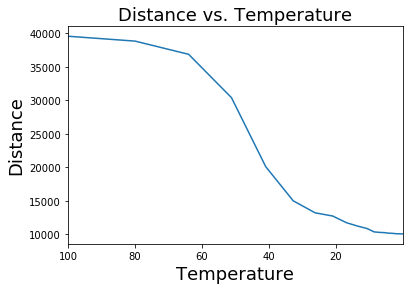

Best TSP tour:  [1.0, 4.0, 2.0, 3.0, 7.0, 11.0, 14.0, 13.0, 23.0, 25.0, 17.0, 26.0, 24.0, 21.0, 18.0, 33.0, 28.0, 22.0, 29.0, 37.0, 39.0, 51.0, 47.0, 43.0, 40.0, 34.0, 27.0, 12.0, 10.0, 9.0, 5.0, 15.0, 19.0, 30.0, 32.0, 31.0, 35.0, 42.0, 50.0, 55.0, 49.0, 44.0, 38.0, 41.0, 46.0, 48.0, 54.0, 52.0, 53.0, 56.0, 58.0, 61.0, 67.0, 73.0, 66.0, 68.0, 70.0, 64.0, 45.0, 57.0, 60.0, 69.0, 74.0, 72.0, 75.0, 78.0, 91.0, 93.0, 96.0, 95.0, 92.0, 88.0, 83.0, 81.0, 79.0, 77.0, 84.0, 100.0, 97.0, 106.0, 105.0, 107.0, 108.0, 110.0, 112.0, 115.0, 116.0, 117.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 129.0, 135.0, 136.0, 131.0, 118.0, 122.0, 147.0, 159.0, 162.0, 158.0, 151.0, 155.0, 148.0, 143.0, 160.0, 166.0, 171.0, 170.0, 167.0, 165.0, 168.0, 178.0, 180.0, 185.0, 193.0, 181.0, 177.0, 184.0, 188.0, 189.0, 191.0, 192.0, 190.0, 194.0, 187.0, 186.0, 183.0, 175.0, 173.0, 174.0, 179.0, 172.0, 182.0, 176.0, 169.0, 164.0, 163.0, 161.0, 156.0, 145.0, 140.0, 142.0, 149.0, 146.0, 154.0, 157.0, 150.0, 153.0, 152.

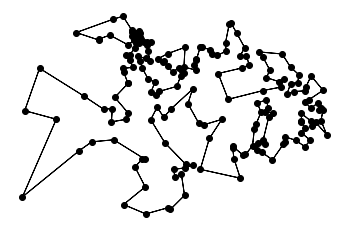


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9729.0


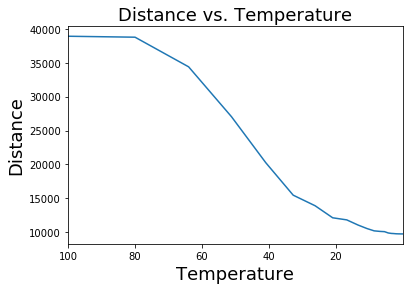

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 114.0, 113.0, 109.0, 122.0, 119.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 137.0, 140.0, 145.0, 156.0, 161.0, 163.0, 164.0, 149.0, 146.0, 142.0, 138.0, 139.0, 144.0, 150.0, 154.0, 157.0, 153.0, 152.0, 141.0, 147.0, 151.0, 155.0, 158.0, 159.0, 165.0, 168.0, 177.0, 181.0, 184.0, 175.0, 173.0, 174.0, 183.0, 179.0, 172.0, 169.0, 176.0, 182.0, 194.0, 186.0, 187.0, 190.0, 192.0, 191.0, 189.0, 188.0, 193.0, 178.0, 180.0, 185.0, 171.0, 170.0, 167.0, 162.0, 166.0, 160.0, 148.0, 143.0, 136.0, 131.0, 129.0, 135.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 118.0, 103.0, 102.0, 87.0, 91.0, 93.0, 96.0, 95.0, 97.0, 92.0, 88.0, 83.0, 79.0, 81.0, 84.0, 77.0, 70.0, 60.0, 69.0, 74.0, 72.0, 78.0, 75.0, 76.0, 80.0, 82.0, 71.0, 25.0, 23.0, 13.0, 14.0, 11.0, 7.0, 17.0, 26.0, 24.0, 21.0, 18.0, 33.0, 28.0

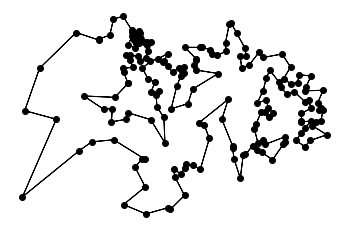


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9792.0


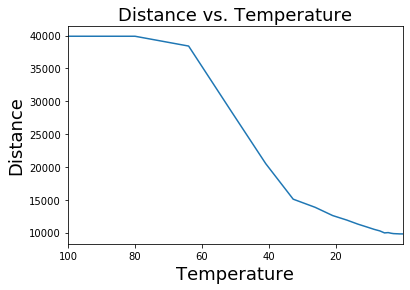

Best TSP tour:  [1.0, 6.0, 8.0, 4.0, 7.0, 11.0, 13.0, 16.0, 82.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 114.0, 109.0, 113.0, 119.0, 122.0, 118.0, 131.0, 129.0, 135.0, 136.0, 148.0, 155.0, 151.0, 147.0, 152.0, 141.0, 144.0, 150.0, 153.0, 157.0, 154.0, 139.0, 138.0, 146.0, 149.0, 142.0, 137.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 140.0, 145.0, 156.0, 161.0, 163.0, 164.0, 169.0, 172.0, 179.0, 176.0, 182.0, 194.0, 190.0, 187.0, 186.0, 183.0, 174.0, 173.0, 175.0, 177.0, 181.0, 184.0, 189.0, 192.0, 191.0, 188.0, 193.0, 178.0, 180.0, 185.0, 171.0, 170.0, 167.0, 168.0, 165.0, 159.0, 158.0, 162.0, 166.0, 160.0, 143.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 97.0, 92.0, 95.0, 96.0, 93.0, 91.0, 103.0, 102.0, 87.0, 80.0, 71.0, 25.0, 23.0, 14.0, 17.0, 26.0, 24.0, 21.0, 18.0, 33.0, 28.0, 22.0, 29.0, 45.0, 57.0, 64.0, 70.0, 60.0, 69.0, 74.0, 72.0, 76.0, 75.0, 78.0,

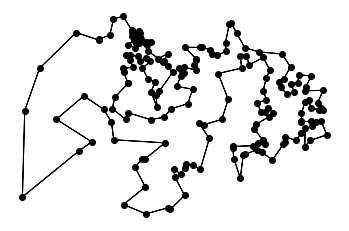


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10082.0


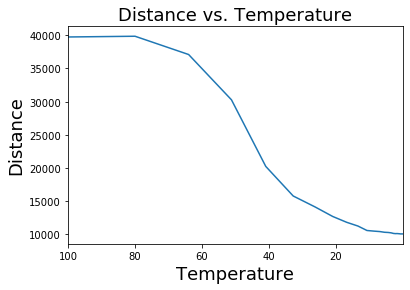

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 13.0, 23.0, 25.0, 71.0, 82.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 130.0, 127.0, 132.0, 134.0, 137.0, 140.0, 142.0, 146.0, 149.0, 145.0, 156.0, 161.0, 163.0, 164.0, 169.0, 176.0, 182.0, 172.0, 179.0, 174.0, 173.0, 183.0, 186.0, 187.0, 194.0, 190.0, 192.0, 191.0, 189.0, 184.0, 188.0, 193.0, 185.0, 180.0, 178.0, 170.0, 171.0, 166.0, 160.0, 143.0, 148.0, 155.0, 151.0, 147.0, 158.0, 162.0, 167.0, 159.0, 165.0, 168.0, 181.0, 177.0, 175.0, 157.0, 154.0, 153.0, 152.0, 141.0, 144.0, 150.0, 139.0, 138.0, 126.0, 125.0, 114.0, 113.0, 119.0, 122.0, 118.0, 131.0, 136.0, 135.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 97.0, 95.0, 96.0, 93.0, 92.0, 88.0, 74.0, 78.0, 91.0, 103.0, 102.0, 109.0, 87.0, 80.0, 76.0, 75.0, 72.0, 69.0, 60.0, 33.0, 45.0, 57.0, 64.0, 70.0, 77.0, 79.0, 81.0, 83.0, 84.0, 68.0, 66.0, 73.0, 67.0, 61.0, 58.

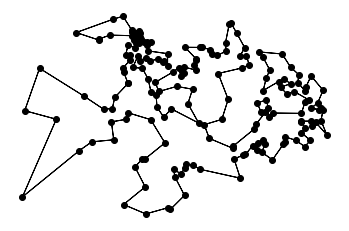


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9662.0


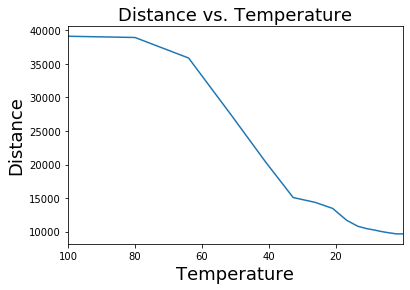

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 13.0, 23.0, 25.0, 14.0, 11.0, 7.0, 17.0, 26.0, 24.0, 21.0, 18.0, 33.0, 28.0, 22.0, 29.0, 45.0, 57.0, 60.0, 69.0, 74.0, 72.0, 78.0, 75.0, 76.0, 87.0, 80.0, 71.0, 82.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 130.0, 127.0, 125.0, 126.0, 114.0, 113.0, 109.0, 102.0, 91.0, 103.0, 118.0, 122.0, 119.0, 141.0, 147.0, 152.0, 153.0, 157.0, 154.0, 150.0, 144.0, 139.0, 138.0, 146.0, 149.0, 142.0, 137.0, 132.0, 134.0, 140.0, 145.0, 156.0, 161.0, 163.0, 164.0, 169.0, 172.0, 179.0, 176.0, 182.0, 194.0, 190.0, 187.0, 186.0, 183.0, 174.0, 173.0, 175.0, 184.0, 189.0, 192.0, 191.0, 188.0, 193.0, 181.0, 177.0, 178.0, 180.0, 185.0, 171.0, 166.0, 160.0, 167.0, 170.0, 168.0, 165.0, 159.0, 162.0, 158.0, 151.0, 155.0, 148.0, 143.0, 136.0, 131.0, 129.0, 135.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 97.0, 95.0, 96.0, 93.0, 92.0, 88.0, 83.0, 79.0

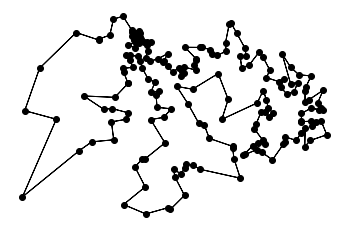


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9871.0


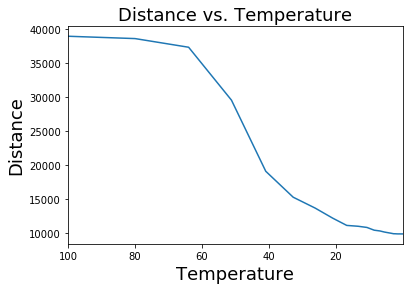

Best TSP tour:  [1.0, 2.0, 3.0, 4.0, 7.0, 11.0, 17.0, 26.0, 24.0, 21.0, 18.0, 28.0, 29.0, 22.0, 27.0, 12.0, 10.0, 9.0, 5.0, 15.0, 19.0, 30.0, 32.0, 31.0, 34.0, 39.0, 37.0, 51.0, 47.0, 43.0, 40.0, 38.0, 35.0, 42.0, 44.0, 49.0, 50.0, 55.0, 54.0, 41.0, 46.0, 48.0, 52.0, 53.0, 56.0, 58.0, 61.0, 66.0, 67.0, 73.0, 68.0, 45.0, 33.0, 60.0, 57.0, 64.0, 70.0, 77.0, 84.0, 81.0, 79.0, 83.0, 92.0, 97.0, 106.0, 105.0, 107.0, 108.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 118.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 129.0, 135.0, 143.0, 148.0, 136.0, 131.0, 122.0, 119.0, 113.0, 109.0, 114.0, 126.0, 125.0, 127.0, 132.0, 134.0, 137.0, 140.0, 145.0, 149.0, 146.0, 142.0, 138.0, 139.0, 154.0, 157.0, 153.0, 150.0, 144.0, 141.0, 152.0, 147.0, 151.0, 155.0, 160.0, 166.0, 171.0, 170.0, 167.0, 162.0, 158.0, 159.0, 165.0, 168.0, 177.0, 181.0, 178.0, 180.0, 185.0, 193.0, 188.0, 184.0, 189.0, 191.0, 192.0, 190.0, 194.0, 187.0, 186.0, 183.0, 175.0, 173.0, 174.0, 179.0, 172.0, 182.0, 176.0, 169.0, 164.0, 163.

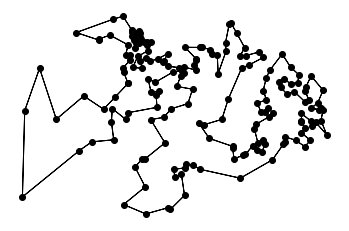


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10001.0


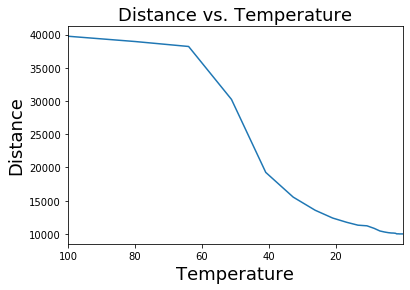

Best TSP tour:  [1.0, 6.0, 4.0, 7.0, 11.0, 14.0, 17.0, 25.0, 23.0, 13.0, 8.0, 16.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 130.0, 156.0, 161.0, 163.0, 164.0, 169.0, 176.0, 182.0, 172.0, 179.0, 194.0, 190.0, 187.0, 186.0, 183.0, 174.0, 173.0, 175.0, 177.0, 184.0, 189.0, 192.0, 191.0, 188.0, 193.0, 181.0, 178.0, 180.0, 185.0, 171.0, 166.0, 160.0, 155.0, 148.0, 143.0, 135.0, 136.0, 131.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 118.0, 122.0, 141.0, 144.0, 150.0, 153.0, 152.0, 147.0, 151.0, 158.0, 162.0, 167.0, 170.0, 168.0, 165.0, 159.0, 157.0, 154.0, 139.0, 138.0, 142.0, 146.0, 149.0, 145.0, 140.0, 137.0, 134.0, 132.0, 127.0, 125.0, 126.0, 119.0, 113.0, 109.0, 114.0, 111.0, 104.0, 101.0, 99.0, 94.0, 90.0, 89.0, 82.0, 71.0, 76.0, 80.0, 87.0, 102.0, 103.0, 91.0, 93.0, 96.0, 95.0, 97.0, 92.0, 88.0, 83.0, 79.0, 81.0, 84.0, 77.0, 70.0, 64.0, 57.0, 60.0, 69.0, 74.0, 78.0, 75.0, 72.0, 26.0, 24.0, 21.0,

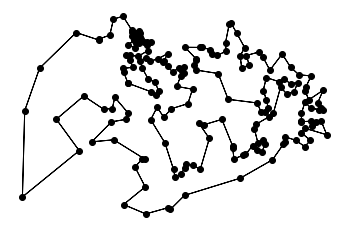


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10264.0


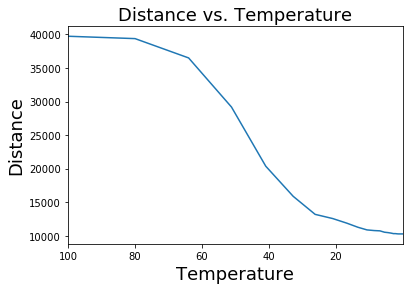

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 130.0, 156.0, 145.0, 149.0, 146.0, 154.0, 157.0, 150.0, 153.0, 152.0, 165.0, 168.0, 167.0, 170.0, 180.0, 178.0, 181.0, 177.0, 184.0, 175.0, 173.0, 174.0, 183.0, 187.0, 186.0, 179.0, 172.0, 164.0, 163.0, 161.0, 169.0, 176.0, 182.0, 194.0, 190.0, 192.0, 191.0, 189.0, 188.0, 193.0, 185.0, 171.0, 166.0, 160.0, 143.0, 148.0, 155.0, 151.0, 158.0, 162.0, 159.0, 147.0, 141.0, 144.0, 139.0, 138.0, 142.0, 140.0, 137.0, 134.0, 132.0, 127.0, 125.0, 126.0, 119.0, 122.0, 131.0, 136.0, 135.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 108.0, 107.0, 100.0, 84.0, 81.0, 79.0, 83.0, 88.0, 92.0, 93.0, 96.0, 95.0, 97.0, 105.0, 106.0, 118.0, 103.0, 102.0, 109.0, 113.0, 114.0, 82.0, 71.0, 76.0, 80.0, 87.0, 91.0, 78.0, 75.0, 72.0, 74.0, 69.0, 25.0, 23.0, 13.0, 4.0, 7.0, 11.0, 14.0, 17.0, 26.0, 24.0, 21.0, 18.0, 33.0, 28.0, 29.0, 22.0,

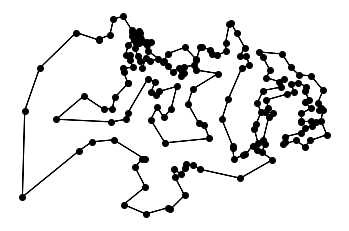


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9927.0


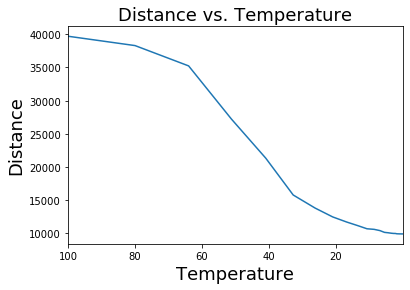

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 13.0, 23.0, 25.0, 17.0, 14.0, 11.0, 7.0, 4.0, 2.0, 3.0, 5.0, 9.0, 10.0, 12.0, 15.0, 19.0, 30.0, 32.0, 35.0, 31.0, 34.0, 40.0, 43.0, 38.0, 41.0, 46.0, 44.0, 42.0, 49.0, 50.0, 55.0, 54.0, 48.0, 52.0, 53.0, 56.0, 58.0, 47.0, 51.0, 39.0, 37.0, 27.0, 22.0, 29.0, 28.0, 18.0, 21.0, 24.0, 26.0, 33.0, 60.0, 57.0, 45.0, 64.0, 68.0, 66.0, 61.0, 67.0, 73.0, 84.0, 83.0, 81.0, 79.0, 77.0, 70.0, 69.0, 74.0, 72.0, 78.0, 75.0, 76.0, 71.0, 80.0, 87.0, 91.0, 88.0, 93.0, 96.0, 95.0, 92.0, 97.0, 106.0, 105.0, 107.0, 108.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 120.0, 123.0, 124.0, 128.0, 121.0, 118.0, 103.0, 102.0, 109.0, 113.0, 119.0, 122.0, 131.0, 136.0, 135.0, 129.0, 133.0, 143.0, 148.0, 151.0, 155.0, 160.0, 166.0, 171.0, 170.0, 180.0, 185.0, 193.0, 188.0, 189.0, 191.0, 192.0, 190.0, 187.0, 183.0, 186.0, 194.0, 182.0, 176.0, 169.0, 172.0, 179.0, 174.0, 173.0, 175.0, 184.0, 177.0, 181.0, 178.0, 168.0, 165.0, 159.0, 167.0, 162.0, 158.0, 147.0, 141.0, 152.0, 153.0,

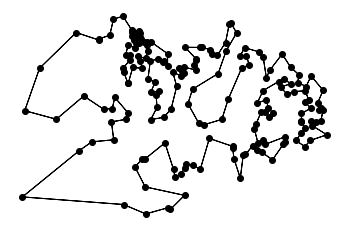


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10014.0


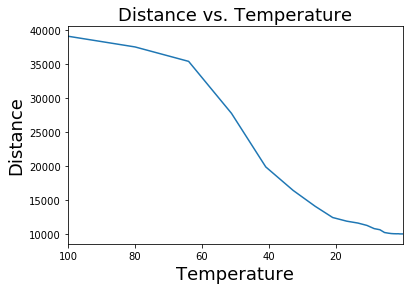

Best TSP tour:  [1.0, 20.0, 65.0, 85.0, 86.0, 98.0, 111.0, 104.0, 101.0, 99.0, 94.0, 90.0, 89.0, 63.0, 36.0, 59.0, 62.0, 82.0, 71.0, 76.0, 80.0, 87.0, 102.0, 109.0, 113.0, 114.0, 119.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 137.0, 140.0, 145.0, 156.0, 149.0, 146.0, 142.0, 138.0, 139.0, 144.0, 150.0, 153.0, 157.0, 154.0, 164.0, 163.0, 161.0, 169.0, 172.0, 179.0, 176.0, 182.0, 194.0, 190.0, 187.0, 186.0, 183.0, 174.0, 173.0, 175.0, 184.0, 177.0, 181.0, 188.0, 189.0, 191.0, 192.0, 193.0, 185.0, 171.0, 167.0, 170.0, 180.0, 178.0, 168.0, 165.0, 159.0, 158.0, 162.0, 166.0, 160.0, 143.0, 148.0, 155.0, 151.0, 147.0, 152.0, 141.0, 122.0, 118.0, 131.0, 136.0, 135.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 108.0, 107.0, 106.0, 105.0, 100.0, 84.0, 81.0, 79.0, 83.0, 88.0, 92.0, 97.0, 95.0, 96.0, 93.0, 103.0, 91.0, 78.0, 75.0, 72.0, 74.0, 69.0, 60.0, 57.0, 64.0, 70.0, 77.0, 68.0, 45.0, 37.0, 39.0, 34.0, 40.0, 38.0, 41.0, 46.0, 48.0, 43.0, 47.0, 51.0, 6

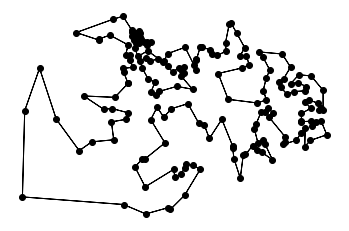


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9676.0


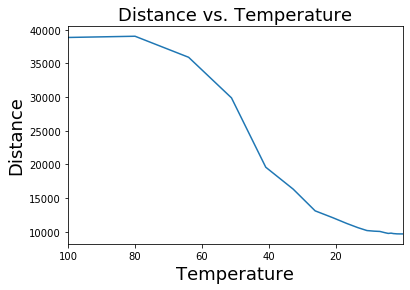

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 13.0, 11.0, 14.0, 23.0, 25.0, 17.0, 26.0, 24.0, 21.0, 18.0, 28.0, 22.0, 29.0, 45.0, 57.0, 64.0, 70.0, 60.0, 33.0, 69.0, 74.0, 72.0, 78.0, 75.0, 76.0, 87.0, 80.0, 71.0, 82.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 114.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 137.0, 142.0, 138.0, 139.0, 146.0, 149.0, 140.0, 145.0, 156.0, 161.0, 163.0, 164.0, 169.0, 176.0, 182.0, 194.0, 190.0, 187.0, 183.0, 186.0, 179.0, 172.0, 174.0, 173.0, 175.0, 177.0, 168.0, 165.0, 159.0, 158.0, 162.0, 167.0, 170.0, 180.0, 178.0, 181.0, 184.0, 189.0, 192.0, 191.0, 188.0, 193.0, 185.0, 171.0, 166.0, 160.0, 143.0, 148.0, 155.0, 151.0, 147.0, 152.0, 153.0, 157.0, 154.0, 150.0, 144.0, 141.0, 122.0, 119.0, 113.0, 109.0, 102.0, 103.0, 91.0, 93.0, 88.0, 83.0, 92.0, 97.0, 95.0, 96.0, 106.0, 105.0, 107.0, 108.0, 118.0, 131.0, 136.0, 135.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.

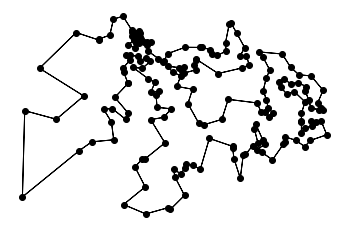


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10089.0


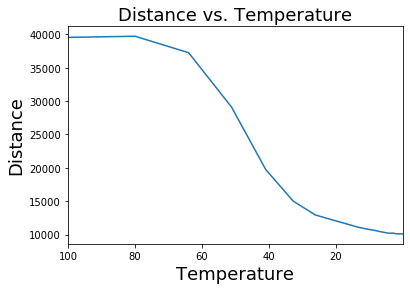

Best TSP tour:  [1.0, 20.0, 63.0, 65.0, 85.0, 86.0, 98.0, 111.0, 104.0, 101.0, 99.0, 94.0, 90.0, 89.0, 36.0, 59.0, 62.0, 82.0, 80.0, 87.0, 102.0, 109.0, 113.0, 114.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 137.0, 119.0, 122.0, 141.0, 147.0, 152.0, 153.0, 157.0, 154.0, 150.0, 144.0, 139.0, 138.0, 146.0, 149.0, 142.0, 140.0, 145.0, 156.0, 161.0, 163.0, 164.0, 169.0, 176.0, 182.0, 194.0, 190.0, 187.0, 183.0, 186.0, 179.0, 172.0, 174.0, 173.0, 175.0, 177.0, 181.0, 184.0, 189.0, 192.0, 191.0, 188.0, 193.0, 178.0, 180.0, 185.0, 171.0, 170.0, 167.0, 168.0, 165.0, 159.0, 158.0, 162.0, 166.0, 160.0, 155.0, 151.0, 148.0, 143.0, 135.0, 136.0, 131.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 118.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 103.0, 91.0, 93.0, 96.0, 95.0, 97.0, 92.0, 88.0, 83.0, 79.0, 81.0, 84.0, 77.0, 68.0, 70.0, 69.0, 74.0, 72.0, 78.0, 75.0, 76.0, 71.0, 23.0, 25.0, 17.0, 26.0, 24.0, 21.0, 18.0, 28.0, 33.0, 60.0, 57.0, 64.0, 45.0, 29.0, 22.0, 2

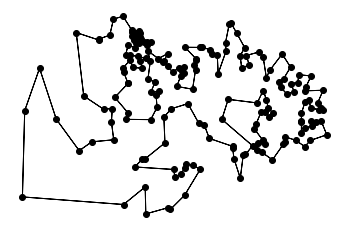


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9725.0


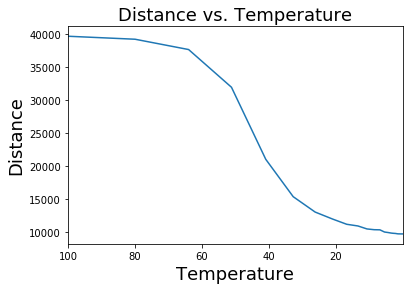

Best TSP tour:  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 10.0, 12.0, 15.0, 19.0, 30.0, 32.0, 31.0, 35.0, 44.0, 42.0, 50.0, 49.0, 55.0, 54.0, 52.0, 53.0, 56.0, 48.0, 46.0, 41.0, 38.0, 43.0, 40.0, 34.0, 39.0, 51.0, 47.0, 58.0, 61.0, 67.0, 73.0, 66.0, 68.0, 64.0, 70.0, 77.0, 84.0, 81.0, 79.0, 83.0, 88.0, 91.0, 93.0, 96.0, 95.0, 92.0, 97.0, 106.0, 105.0, 107.0, 108.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 118.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 129.0, 135.0, 136.0, 143.0, 148.0, 155.0, 151.0, 158.0, 159.0, 165.0, 168.0, 167.0, 162.0, 160.0, 166.0, 171.0, 170.0, 178.0, 180.0, 185.0, 193.0, 188.0, 191.0, 192.0, 189.0, 184.0, 181.0, 177.0, 175.0, 173.0, 174.0, 183.0, 186.0, 187.0, 190.0, 194.0, 182.0, 176.0, 179.0, 172.0, 169.0, 164.0, 163.0, 161.0, 156.0, 130.0, 127.0, 125.0, 126.0, 132.0, 134.0, 137.0, 140.0, 145.0, 149.0, 146.0, 142.0, 138.0, 139.0, 144.0, 150.0, 154.0, 157.0, 153.0, 152.0, 141.0, 147.0, 131.0, 122.0, 119.0, 114.0, 113.0, 109.0, 102.0, 103.0, 87.0, 80.0, 82.0, 89.0, 90.

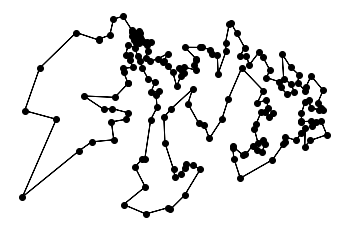


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9808.0


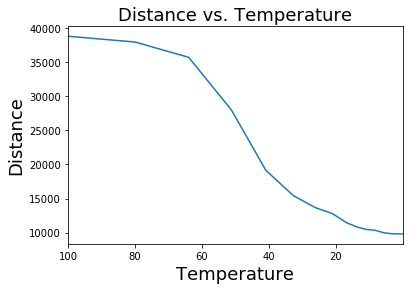

Best TSP tour:  [1.0, 2.0, 3.0, 5.0, 9.0, 10.0, 12.0, 15.0, 19.0, 30.0, 32.0, 31.0, 35.0, 42.0, 44.0, 49.0, 50.0, 55.0, 54.0, 56.0, 53.0, 52.0, 48.0, 46.0, 41.0, 38.0, 43.0, 40.0, 34.0, 39.0, 51.0, 47.0, 58.0, 61.0, 67.0, 73.0, 66.0, 68.0, 64.0, 70.0, 77.0, 79.0, 81.0, 83.0, 84.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 135.0, 129.0, 131.0, 136.0, 143.0, 148.0, 155.0, 160.0, 166.0, 171.0, 185.0, 193.0, 188.0, 184.0, 189.0, 191.0, 192.0, 190.0, 194.0, 182.0, 176.0, 161.0, 163.0, 164.0, 169.0, 172.0, 179.0, 186.0, 187.0, 183.0, 174.0, 173.0, 175.0, 177.0, 181.0, 178.0, 180.0, 170.0, 167.0, 168.0, 165.0, 159.0, 162.0, 158.0, 151.0, 147.0, 152.0, 141.0, 144.0, 150.0, 153.0, 157.0, 154.0, 139.0, 138.0, 142.0, 146.0, 149.0, 156.0, 145.0, 140.0, 137.0, 134.0, 132.0, 130.0, 127.0, 125.0, 126.0, 114.0, 119.0, 122.0, 118.0, 106.0, 105.0, 108.0, 107.0, 97.0, 92.0, 88.0, 95.0, 96.0, 93.0, 103.0, 91.0, 78.0, 75.0, 72.0, 74.0, 69.0, 60.0, 57.0, 45.0, 29.0,

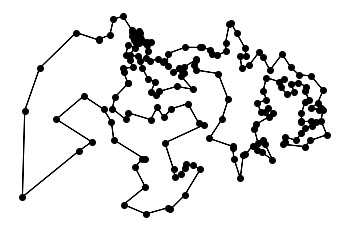


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9874.0


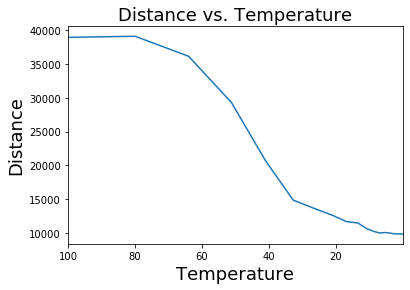

Best TSP tour:  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 10.0, 12.0, 15.0, 19.0, 30.0, 32.0, 31.0, 35.0, 42.0, 44.0, 49.0, 50.0, 55.0, 54.0, 46.0, 41.0, 38.0, 40.0, 43.0, 48.0, 52.0, 53.0, 56.0, 58.0, 47.0, 39.0, 34.0, 27.0, 22.0, 29.0, 28.0, 33.0, 18.0, 21.0, 24.0, 26.0, 17.0, 7.0, 11.0, 14.0, 13.0, 23.0, 25.0, 71.0, 80.0, 87.0, 76.0, 75.0, 78.0, 72.0, 74.0, 69.0, 60.0, 57.0, 45.0, 37.0, 51.0, 61.0, 67.0, 73.0, 66.0, 68.0, 64.0, 70.0, 77.0, 79.0, 81.0, 83.0, 84.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 129.0, 135.0, 136.0, 131.0, 118.0, 108.0, 107.0, 105.0, 106.0, 97.0, 92.0, 88.0, 95.0, 96.0, 93.0, 91.0, 103.0, 102.0, 109.0, 113.0, 114.0, 119.0, 122.0, 141.0, 152.0, 147.0, 151.0, 155.0, 148.0, 143.0, 160.0, 166.0, 171.0, 185.0, 180.0, 193.0, 188.0, 189.0, 191.0, 192.0, 190.0, 194.0, 187.0, 183.0, 186.0, 179.0, 182.0, 176.0, 172.0, 174.0, 173.0, 175.0, 184.0, 177.0, 181.0, 178.0, 168.0, 170.0, 167.0, 162.0, 158.0, 159.0, 165.0, 153.0, 157.0, 154.0, 1

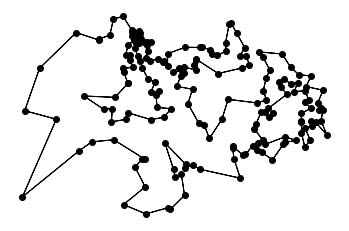


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9884.0


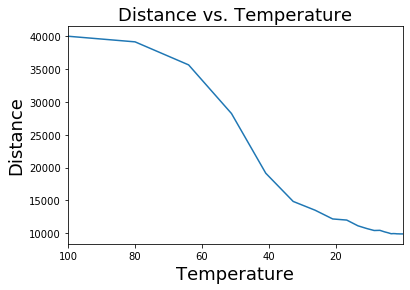

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 13.0, 23.0, 25.0, 76.0, 75.0, 78.0, 72.0, 74.0, 69.0, 83.0, 88.0, 92.0, 97.0, 95.0, 96.0, 93.0, 91.0, 103.0, 102.0, 87.0, 80.0, 71.0, 82.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 114.0, 109.0, 113.0, 119.0, 122.0, 141.0, 144.0, 150.0, 154.0, 157.0, 153.0, 152.0, 147.0, 151.0, 158.0, 159.0, 165.0, 168.0, 177.0, 181.0, 184.0, 175.0, 173.0, 174.0, 179.0, 172.0, 164.0, 149.0, 146.0, 139.0, 138.0, 142.0, 137.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 140.0, 145.0, 156.0, 161.0, 163.0, 169.0, 176.0, 182.0, 194.0, 190.0, 187.0, 186.0, 183.0, 189.0, 192.0, 191.0, 188.0, 193.0, 178.0, 180.0, 185.0, 171.0, 170.0, 167.0, 162.0, 166.0, 160.0, 155.0, 148.0, 143.0, 136.0, 131.0, 129.0, 135.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 118.0, 117.0, 116.0, 115.0, 112.0, 110.0, 108.0, 107.0, 106.0, 105.0, 100.0, 84.0, 81.0, 79.0, 77.0, 70.0, 64.0, 68.0, 66.0, 73.0, 67.0, 61.0, 58.0, 56.0, 53.0, 52.0, 48.

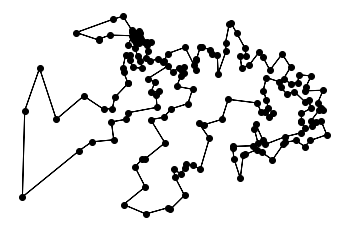


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10009.0


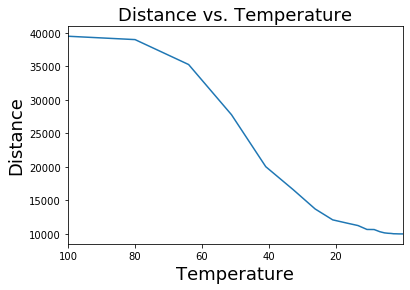

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 82.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 130.0, 156.0, 161.0, 163.0, 164.0, 157.0, 154.0, 150.0, 144.0, 139.0, 138.0, 142.0, 146.0, 149.0, 145.0, 140.0, 137.0, 134.0, 132.0, 127.0, 125.0, 126.0, 119.0, 114.0, 113.0, 109.0, 102.0, 103.0, 91.0, 87.0, 80.0, 71.0, 76.0, 75.0, 78.0, 72.0, 74.0, 69.0, 60.0, 64.0, 70.0, 77.0, 79.0, 81.0, 83.0, 88.0, 93.0, 96.0, 95.0, 92.0, 97.0, 108.0, 107.0, 105.0, 106.0, 118.0, 122.0, 131.0, 136.0, 155.0, 151.0, 147.0, 141.0, 152.0, 153.0, 165.0, 159.0, 158.0, 162.0, 167.0, 168.0, 170.0, 180.0, 178.0, 181.0, 177.0, 184.0, 175.0, 173.0, 174.0, 179.0, 172.0, 169.0, 176.0, 182.0, 194.0, 186.0, 183.0, 187.0, 190.0, 192.0, 191.0, 189.0, 188.0, 193.0, 185.0, 171.0, 166.0, 160.0, 148.0, 143.0, 135.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 84.0, 68.0, 66.0, 73.0, 67.0, 61.0, 58.0, 56.0, 53.0, 52.0, 54.0, 55.0, 49.

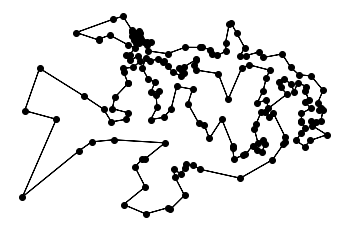


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9797.0


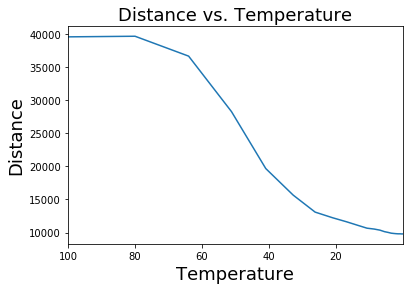

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 59.0, 62.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 111.0, 104.0, 101.0, 99.0, 94.0, 90.0, 89.0, 82.0, 80.0, 87.0, 78.0, 74.0, 69.0, 72.0, 75.0, 76.0, 71.0, 25.0, 23.0, 13.0, 14.0, 11.0, 7.0, 17.0, 26.0, 24.0, 21.0, 18.0, 28.0, 22.0, 29.0, 45.0, 57.0, 33.0, 60.0, 64.0, 70.0, 77.0, 79.0, 81.0, 83.0, 88.0, 92.0, 97.0, 108.0, 107.0, 105.0, 106.0, 96.0, 95.0, 93.0, 91.0, 102.0, 103.0, 118.0, 122.0, 119.0, 113.0, 109.0, 114.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 137.0, 140.0, 145.0, 156.0, 161.0, 163.0, 164.0, 149.0, 146.0, 142.0, 138.0, 139.0, 144.0, 150.0, 154.0, 157.0, 153.0, 141.0, 152.0, 165.0, 168.0, 167.0, 170.0, 180.0, 178.0, 181.0, 177.0, 184.0, 175.0, 173.0, 174.0, 179.0, 172.0, 169.0, 176.0, 182.0, 194.0, 186.0, 183.0, 187.0, 190.0, 192.0, 191.0, 189.0, 188.0, 193.0, 185.0, 171.0, 166.0, 160.0, 162.0, 158.0, 159.0, 147.0, 151.0, 155.0, 148.0, 143.0, 136.0, 131.0, 129.0, 135.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 11

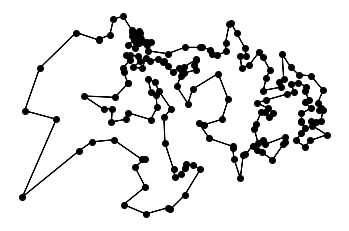


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9811.0


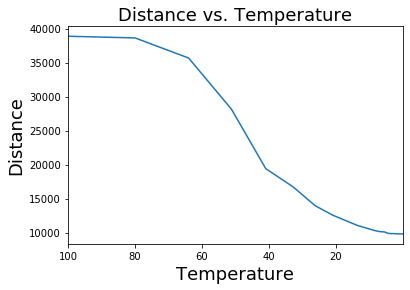

Best TSP tour:  [1.0, 2.0, 3.0, 5.0, 9.0, 10.0, 12.0, 15.0, 19.0, 30.0, 32.0, 31.0, 34.0, 40.0, 43.0, 48.0, 46.0, 44.0, 41.0, 38.0, 35.0, 42.0, 50.0, 49.0, 55.0, 54.0, 52.0, 53.0, 56.0, 58.0, 67.0, 73.0, 66.0, 61.0, 51.0, 47.0, 39.0, 27.0, 37.0, 45.0, 68.0, 64.0, 70.0, 77.0, 84.0, 81.0, 79.0, 83.0, 88.0, 93.0, 96.0, 95.0, 92.0, 97.0, 106.0, 105.0, 107.0, 108.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 118.0, 122.0, 138.0, 139.0, 154.0, 157.0, 153.0, 150.0, 144.0, 141.0, 152.0, 147.0, 158.0, 151.0, 155.0, 136.0, 131.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 129.0, 135.0, 143.0, 148.0, 160.0, 166.0, 171.0, 170.0, 167.0, 162.0, 159.0, 165.0, 168.0, 178.0, 180.0, 185.0, 193.0, 188.0, 191.0, 192.0, 189.0, 184.0, 181.0, 177.0, 175.0, 173.0, 174.0, 179.0, 186.0, 183.0, 187.0, 190.0, 194.0, 182.0, 176.0, 172.0, 169.0, 164.0, 163.0, 161.0, 156.0, 145.0, 149.0, 146.0, 142.0, 140.0, 137.0, 134.0, 132.0, 130.0, 127.0, 125.0, 126.0, 119.0, 114.0, 113.0, 109.0, 82.0, 89.0, 90.0, 94.0, 99.0, 101.

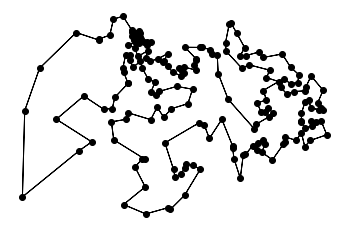


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9874.0


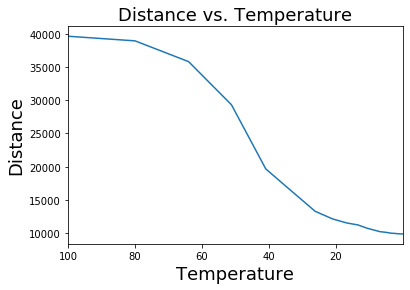

Best TSP tour:  [1.0, 6.0, 8.0, 16.0, 13.0, 23.0, 25.0, 71.0, 76.0, 75.0, 78.0, 72.0, 74.0, 69.0, 60.0, 57.0, 45.0, 64.0, 70.0, 79.0, 81.0, 83.0, 88.0, 92.0, 97.0, 108.0, 107.0, 105.0, 106.0, 96.0, 95.0, 93.0, 91.0, 103.0, 102.0, 87.0, 80.0, 82.0, 89.0, 62.0, 59.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 94.0, 99.0, 101.0, 104.0, 111.0, 130.0, 156.0, 161.0, 163.0, 164.0, 154.0, 157.0, 153.0, 150.0, 144.0, 139.0, 138.0, 142.0, 146.0, 149.0, 145.0, 140.0, 137.0, 134.0, 132.0, 127.0, 125.0, 126.0, 114.0, 109.0, 113.0, 119.0, 122.0, 141.0, 152.0, 147.0, 151.0, 158.0, 162.0, 159.0, 165.0, 168.0, 167.0, 170.0, 180.0, 178.0, 181.0, 177.0, 184.0, 175.0, 173.0, 174.0, 179.0, 172.0, 169.0, 176.0, 182.0, 194.0, 190.0, 187.0, 186.0, 183.0, 189.0, 192.0, 191.0, 188.0, 193.0, 185.0, 171.0, 166.0, 160.0, 155.0, 148.0, 143.0, 136.0, 131.0, 129.0, 135.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 118.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 84.0, 77.0, 68.0, 73.0, 67.0, 66.0, 61.0, 58.0, 56.

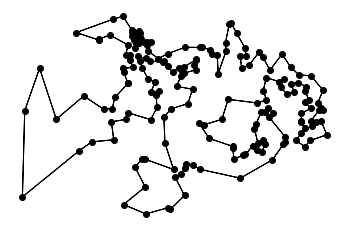


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10212.0


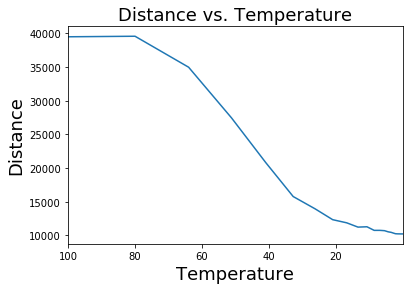

Best TSP tour:  [1.0, 2.0, 3.0, 7.0, 4.0, 6.0, 8.0, 16.0, 13.0, 11.0, 14.0, 23.0, 25.0, 17.0, 26.0, 24.0, 21.0, 18.0, 33.0, 60.0, 57.0, 45.0, 28.0, 29.0, 22.0, 27.0, 12.0, 10.0, 9.0, 5.0, 15.0, 19.0, 30.0, 32.0, 31.0, 35.0, 42.0, 49.0, 50.0, 55.0, 54.0, 52.0, 53.0, 48.0, 46.0, 44.0, 41.0, 38.0, 40.0, 34.0, 39.0, 37.0, 51.0, 47.0, 43.0, 56.0, 58.0, 61.0, 67.0, 73.0, 66.0, 68.0, 64.0, 70.0, 77.0, 84.0, 81.0, 79.0, 83.0, 88.0, 92.0, 97.0, 95.0, 96.0, 93.0, 91.0, 74.0, 69.0, 72.0, 78.0, 75.0, 76.0, 87.0, 80.0, 71.0, 36.0, 59.0, 62.0, 82.0, 114.0, 113.0, 109.0, 102.0, 103.0, 106.0, 105.0, 107.0, 108.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 118.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 135.0, 129.0, 131.0, 136.0, 143.0, 148.0, 160.0, 166.0, 171.0, 170.0, 185.0, 180.0, 178.0, 168.0, 175.0, 184.0, 177.0, 181.0, 193.0, 188.0, 189.0, 191.0, 192.0, 190.0, 187.0, 183.0, 173.0, 174.0, 172.0, 179.0, 186.0, 194.0, 182.0, 176.0, 169.0, 164.0, 163.0, 161.0, 156.0, 145.0, 140.0, 137.0, 142.0, 149

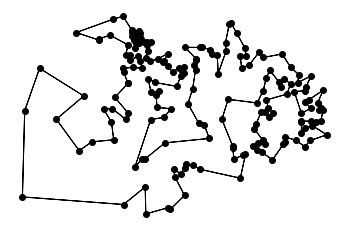


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9856.0


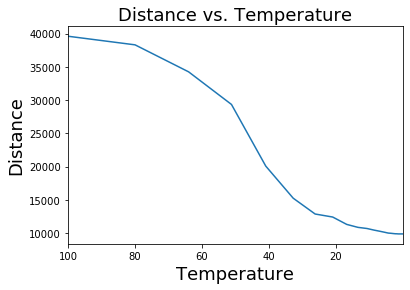

Best TSP tour:  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 10.0, 12.0, 15.0, 19.0, 30.0, 32.0, 31.0, 35.0, 42.0, 50.0, 55.0, 49.0, 44.0, 54.0, 52.0, 53.0, 56.0, 48.0, 46.0, 41.0, 38.0, 43.0, 40.0, 34.0, 39.0, 51.0, 47.0, 58.0, 61.0, 67.0, 73.0, 66.0, 68.0, 37.0, 27.0, 22.0, 29.0, 28.0, 45.0, 64.0, 70.0, 77.0, 84.0, 81.0, 79.0, 83.0, 88.0, 92.0, 95.0, 93.0, 96.0, 97.0, 106.0, 105.0, 107.0, 108.0, 100.0, 110.0, 112.0, 115.0, 116.0, 117.0, 121.0, 120.0, 123.0, 124.0, 128.0, 133.0, 129.0, 135.0, 143.0, 148.0, 160.0, 166.0, 162.0, 167.0, 168.0, 170.0, 171.0, 185.0, 193.0, 180.0, 178.0, 181.0, 177.0, 184.0, 188.0, 189.0, 191.0, 192.0, 190.0, 194.0, 187.0, 183.0, 186.0, 179.0, 182.0, 176.0, 169.0, 161.0, 163.0, 164.0, 172.0, 174.0, 173.0, 175.0, 165.0, 159.0, 158.0, 151.0, 155.0, 136.0, 131.0, 118.0, 103.0, 91.0, 102.0, 109.0, 113.0, 114.0, 119.0, 122.0, 141.0, 147.0, 152.0, 153.0, 157.0, 154.0, 150.0, 144.0, 139.0, 138.0, 137.0, 142.0, 146.0, 149.0, 156.0, 145.0, 140.0, 134.0, 132.0, 126.0, 125.0, 127.0

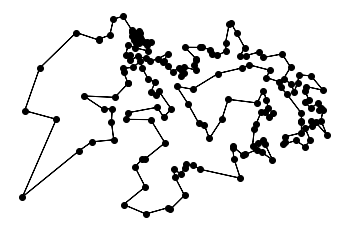


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9955.0


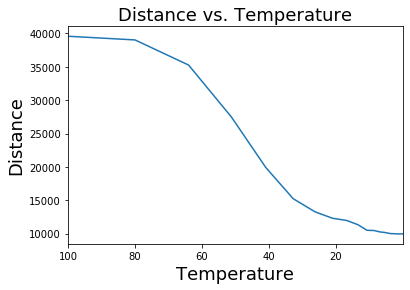

Best TSP tour:  [1.0, 6.0, 8.0, 13.0, 23.0, 25.0, 14.0, 11.0, 17.0, 26.0, 24.0, 21.0, 18.0, 28.0, 29.0, 22.0, 27.0, 39.0, 37.0, 45.0, 57.0, 33.0, 60.0, 69.0, 74.0, 72.0, 71.0, 82.0, 62.0, 59.0, 16.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 114.0, 109.0, 113.0, 119.0, 122.0, 141.0, 152.0, 153.0, 157.0, 154.0, 150.0, 144.0, 139.0, 138.0, 146.0, 149.0, 142.0, 137.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 140.0, 145.0, 156.0, 161.0, 163.0, 164.0, 169.0, 172.0, 176.0, 182.0, 194.0, 190.0, 187.0, 183.0, 186.0, 179.0, 174.0, 173.0, 175.0, 177.0, 181.0, 184.0, 189.0, 192.0, 191.0, 188.0, 193.0, 185.0, 180.0, 178.0, 170.0, 171.0, 167.0, 168.0, 165.0, 159.0, 147.0, 151.0, 155.0, 158.0, 162.0, 166.0, 160.0, 148.0, 143.0, 136.0, 131.0, 129.0, 135.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 118.0, 103.0, 102.0, 87.0, 80.0, 76.0, 75.0, 78.0, 91.0, 93.0, 96.0, 95.0, 97.0, 92.0, 88.

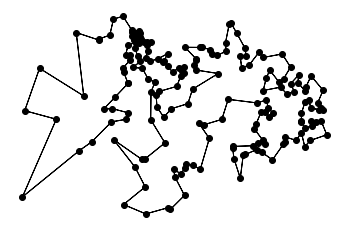


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  10088.0


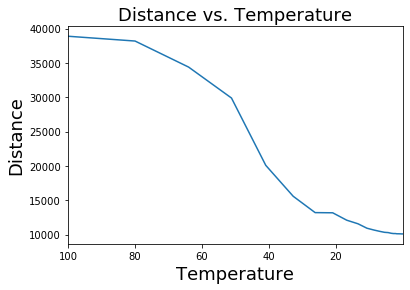

Best TSP tour:  [1.0, 6.0, 8.0, 36.0, 63.0, 20.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 130.0, 127.0, 125.0, 126.0, 132.0, 134.0, 137.0, 140.0, 142.0, 146.0, 149.0, 145.0, 156.0, 161.0, 163.0, 164.0, 169.0, 172.0, 179.0, 174.0, 173.0, 183.0, 187.0, 186.0, 176.0, 182.0, 194.0, 190.0, 192.0, 191.0, 189.0, 188.0, 184.0, 175.0, 177.0, 181.0, 193.0, 185.0, 180.0, 178.0, 170.0, 171.0, 166.0, 160.0, 143.0, 148.0, 155.0, 151.0, 158.0, 162.0, 167.0, 168.0, 165.0, 159.0, 147.0, 152.0, 141.0, 144.0, 150.0, 153.0, 157.0, 154.0, 139.0, 138.0, 114.0, 109.0, 113.0, 119.0, 122.0, 118.0, 131.0, 136.0, 135.0, 129.0, 133.0, 128.0, 124.0, 123.0, 120.0, 121.0, 117.0, 116.0, 115.0, 112.0, 110.0, 100.0, 108.0, 107.0, 105.0, 106.0, 97.0, 92.0, 95.0, 96.0, 93.0, 91.0, 103.0, 102.0, 87.0, 80.0, 76.0, 75.0, 78.0, 88.0, 83.0, 79.0, 81.0, 84.0, 77.0, 70.0, 68.0, 64.0, 60.0, 57.0, 45.0, 37.0, 39.0, 47.0, 51.0, 61.0, 66.0, 73.0, 67.0, 58.0, 56.0, 53.0, 52.0, 54.0, 55.0, 50.0, 49.0, 42.

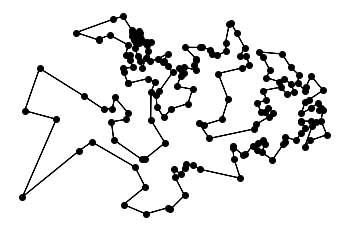


Simulated Annealing terminated after 41 epochs.
Best TSP tour length:  9913.0


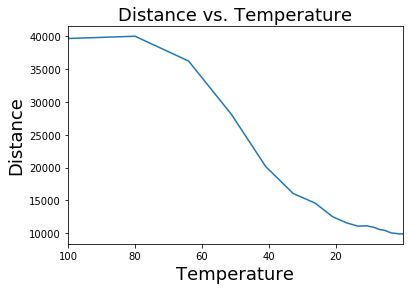

Best TSP tour:  [1.0, 20.0, 63.0, 65.0, 85.0, 86.0, 98.0, 90.0, 89.0, 94.0, 99.0, 101.0, 104.0, 111.0, 114.0, 109.0, 113.0, 119.0, 126.0, 125.0, 127.0, 130.0, 132.0, 134.0, 137.0, 140.0, 145.0, 142.0, 138.0, 139.0, 146.0, 149.0, 156.0, 161.0, 163.0, 164.0, 169.0, 176.0, 182.0, 172.0, 179.0, 186.0, 194.0, 190.0, 187.0, 183.0, 174.0, 173.0, 175.0, 177.0, 181.0, 184.0, 189.0, 192.0, 191.0, 188.0, 193.0, 185.0, 180.0, 178.0, 168.0, 165.0, 159.0, 152.0, 153.0, 157.0, 154.0, 150.0, 144.0, 141.0, 147.0, 151.0, 155.0, 158.0, 162.0, 167.0, 170.0, 171.0, 166.0, 160.0, 148.0, 143.0, 133.0, 129.0, 135.0, 136.0, 131.0, 122.0, 118.0, 117.0, 121.0, 128.0, 124.0, 123.0, 120.0, 116.0, 115.0, 112.0, 110.0, 100.0, 84.0, 83.0, 81.0, 79.0, 77.0, 70.0, 64.0, 68.0, 66.0, 73.0, 67.0, 61.0, 51.0, 39.0, 34.0, 40.0, 43.0, 47.0, 58.0, 56.0, 53.0, 52.0, 54.0, 48.0, 46.0, 41.0, 38.0, 44.0, 49.0, 55.0, 50.0, 42.0, 35.0, 31.0, 32.0, 30.0, 19.0, 15.0, 12.0, 10.0, 9.0, 5.0, 3.0, 2.0, 4.0, 7.0, 11.0, 14.0, 13.0, 23.0, 2

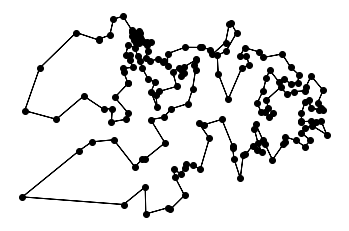

max:  10264.0 min:  9662.0
Wall time: 9min 3s


In [152]:
%%time
distances = []
for i in range(25):
    solver.Solve(city_list = cities_matrix, dist_matrix = distances_matrix, start_temp = 100, \
                  stop_temp = 1e-2, alpha = .8, epoch_length = 10, \
                  epoch_length_factor = 5, screen_output = False)
    solver.PrintSolution()
    distances.append(solver.GetBestDist())
print('max: ', max(distances), 'min: ', min(distances))